# Prepare OT data and Identify Radar Scan Types

## Imports

In [2]:
import xarray as xr
from distributed import LocalCluster, Client
import glob
import hvplot.xarray
import pyart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dask
import warnings
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
/Users/mgrover/miniforge3/envs/pyart-docs/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Spin up a Cluster

In [3]:
cluster = LocalCluster()
client = Client(cluster)
client

<Client: 'tcp://127.0.0.1:50487' processes=5 threads=10, memory=32.00 GiB>

## Load in the Data

In [4]:
files = sorted(glob.glob("../../data/2018151/*"))
radar_files = sorted(glob.glob("../../data/sgpxsaprcmacsecI6/*"))

In [31]:
ot_dirs = sorted(glob.glob("../../data/2018*"))

['../../data/2018144',
 '../../data/2018145',
 '../../data/2018149',
 '../../data/2018150',
 '../../data/2018151',
 '../../data/2018181',
 '../../data/2018182',
 '../../data/2018195',
 '../../data/2018196',
 '../../data/2018207',
 '../../data/2018228',
 '../../data/2018229',
 '../../data/2018231',
 '../../data/2018232']

## Convert the merged dataset to zarr

Read in the OT algorithm output, merge into single days, and covert to zarr!

In [39]:
for ot_dir in ot_dirs:
    files = sorted(glob.glob(f"{ot_dir}/*"))
    ds = xr.open_mfdataset(files,
                           chunks={'time':120},
                           concat_dim='time',
                           combine='nested')
    
    # Add in the parallax correction
    ds["parallax_correction_latitude"] = ds.parallax_correction_latitude + ds.latitude
    ds["parallax_correction_longitude"] = ds.parallax_correction_longitude + ds.longitude
    ds = ds.set_coords(['parallax_correction_longitude',
                        'parallax_correction_latitude'])
    
    # Create an output file name from the time
    file_label = pd.to_datetime(ds.time.values[0]).strftime("ot_output_%Y%m%d.zarr")
    
    try:
        # Make sure the times are in a single chunk
        ds.chunk({'time':120}).to_zarr(f"../../data/cot-zarr/{file_label}")
    except:
        continue
        
    
    print("Done with: ", file_label)

Done with:  ot_output_20180524.zarr
Done with:  ot_output_20180525.zarr


2022-09-29 15:33:49,333 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-09-29 15:33:50,610 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


Done with:  ot_output_20180529.zarr


2022-09-29 15:33:59,876 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2022-09-29 15:34:11,860 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-09-29 15:34:12,150 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-09-29 15:34:12,632 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-09-29 15:34:12,751 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-09-29 15:34:13,034 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-09-29 15:34:14,051 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-09-29 15:34:14,433 - distributed.utils_perf - WARNING - full garbage collections took

Done with:  ot_output_20180530.zarr


2022-09-29 15:34:23,623 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-09-29 15:34:31,778 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2022-09-29 15:34:32,032 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:34:32,146 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-09-29 15:34:32,211 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:34:32,265 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-09-29 15:34:32,309 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:34:32,504 - distributed.utils_perf - WARNING - full garbage collections took

Done with:  ot_output_20180531.zarr


2022-09-29 15:34:47,083 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:34:47,544 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:34:53,533 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2022-09-29 15:34:53,705 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2022-09-29 15:34:53,852 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:34:54,045 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:34:54,155 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:34:54,194 - distributed.utils_perf - WARNING - full garbage collections took

Done with:  ot_output_20180630.zarr


2022-09-29 15:35:08,234 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:35:13,622 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:35:17,297 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:35:17,299 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2022-09-29 15:35:17,571 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:35:17,648 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:35:17,885 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:35:18,175 - distributed.utils_perf - WARNING - full garbage collections took

Done with:  ot_output_20180701.zarr


2022-09-29 15:35:29,173 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-09-29 15:35:30,455 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2022-09-29 15:35:30,467 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:35:30,919 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:35:31,631 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


Done with:  ot_output_20180714.zarr


2022-09-29 15:35:36,900 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:35:36,905 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2022-09-29 15:35:37,185 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


Done with:  ot_output_20180715.zarr


2022-09-29 15:35:42,743 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


Done with:  ot_output_20180726.zarr


2022-09-29 15:35:57,248 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:36:08,206 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:36:20,490 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-09-29 15:36:20,577 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:36:20,581 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-09-29 15:36:20,584 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:36:20,584 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-09-29 15:36:20,699 - distributed.utils_perf - WARNING - full garbage collections took

Done with:  ot_output_20180816.zarr


2022-09-29 15:36:45,729 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:36:45,847 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-09-29 15:36:45,996 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-09-29 15:36:46,117 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:36:46,120 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-09-29 15:36:46,260 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:36:46,433 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-09-29 15:36:46,539 - distributed.utils_perf - WARNING - full garbage collections took

Done with:  ot_output_20180817.zarr


2022-09-29 15:36:59,862 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:37:00,083 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-09-29 15:37:16,118 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-09-29 15:37:23,640 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-09-29 15:37:23,675 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:37:23,680 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-09-29 15:37:23,687 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-09-29 15:37:23,700 - distributed.utils_perf - WARNING - full garbage collections took

Done with:  ot_output_20180819.zarr


2022-09-29 15:37:43,372 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-09-29 15:37:49,658 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:37:52,542 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-09-29 15:37:52,546 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-09-29 15:37:53,035 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-09-29 15:37:53,036 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-09-29 15:37:53,047 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-09-29 15:37:53,058 - distributed.utils_perf - WARNING - full garbage collections took

Done with:  ot_output_20180820.zarr


## Determine the Scan Type
There were two scan types
* Dual-doppler focused, looking at the full column (with the lowest elevation less than 1 degree)
* KDP focused, looking at the midlevels, at a higher vertical resolution (non suitable for dual-dopppler analysis)

We setup a helper function, which can be parallelized across each file, to help us determine if there are lower scans (<1 degree) in the file

In [31]:
@dask.delayed
def determine_scan_type(file):
    radar = pyart.io.read(file).extract_sweeps([0])
    lowest_elevation = radar.fixed_angle["data"][0]
    time = pd.to_datetime(radar.time["units"][14:])
    if lowest_elevation < 1:
        scan_type = "dda"
    else:
        scan_type = "kdp"
    del radar
    return pd.DataFrame({'elevation':lowest_elevation,
                         'scan_type':scan_type}, index=[time])

In [32]:
scan_info = []
for file in radar_files:
    scan_info.append(determine_scan_type(file))

In [ ]:
scan_info_computed = dask.compute(scan_info)

In [35]:
df = pd.concat(scan_info_computed[0])

<AxesSubplot:>

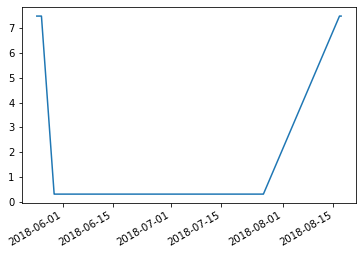

In [37]:
df.elevation.plot()

Let's export this to a file!

In [2]:
station = 'KLOT'
file = f'{station}.csv'
file

'KLOT.csv'

In [94]:
df.to_csv("scan_type_sgpxsaprcmacsecI6.csv")